In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
import os
import numpy as np # delete if not used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
df = pd.read_csv('BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
pdf = PdfPages("отч_eda.pdf", )

In [5]:
text_for_line = '''
Видим, что есть потолок 
кредитного лимита,
которого достигают совсем 
немного пользователей. 
Возможно, данные неточные и 
этот потолок имеет другой вид.'''

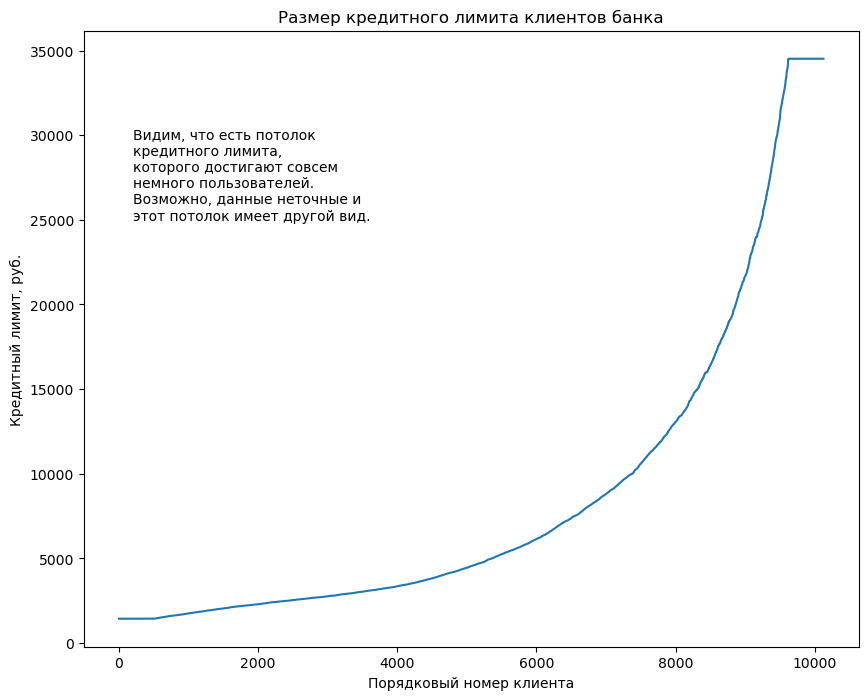

In [6]:
# line plot of credit limit 

a = np.array(df[['Credit_Limit']])
credit_limit = np.sort(a, axis = 0)

plt.figure(figsize = (10,8))
plt.plot(np.linspace(1, len(credit_limit), len(credit_limit)), credit_limit)
plt.xlabel('Порядковый номер клиента')
plt.ylabel('Кредитный лимит, руб.')
plt.title('Размер кредитного лимита клиентов банка')
plt.annotate(text_for_line, (200, 25000));

pdf.savefig()

In [7]:
# bar plot - education level

values_education = df['Education_Level'].value_counts()
values_education

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [8]:
ed_text = '''
Большинство клиентов банка имеют
уровень образования выше 
бакалавриата или закончили старшую 
школу. Стоит отметить, что уровень 
образования полутора тысяч клиентов 
не известен, что может быть препятствием 
для правильных выводов на основании данных.'''

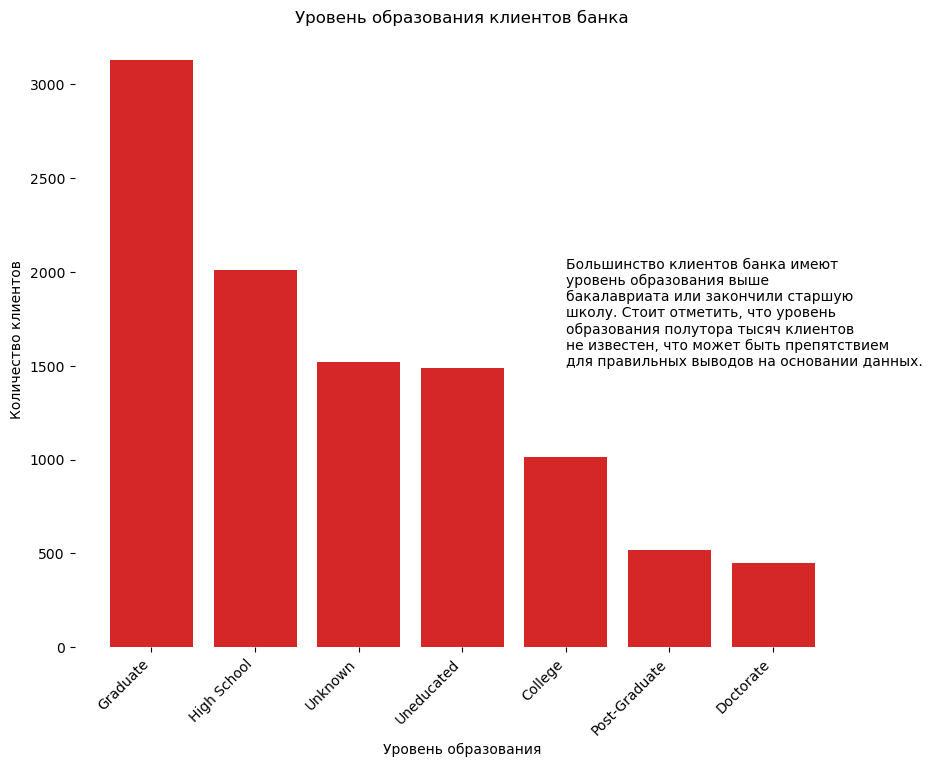

In [9]:
education = ['Graduate', 'High School', 'Unknown', 'Uneducated', 'College', 'Post-Graduate', 'Doctorate']
counts = [3128, 2013, 1519, 1487, 1013, 516, 451]
bar_colors = ['tab:red']

plt.figure(figsize = (10,8))
plt.bar(education, counts, color = bar_colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Уровень образования')
plt.ylabel('Количество клиентов')
plt.title('Уровень образования клиентов банка')
plt.box(False)
plt.annotate(ed_text, (4, 1500))

pdf.savefig()

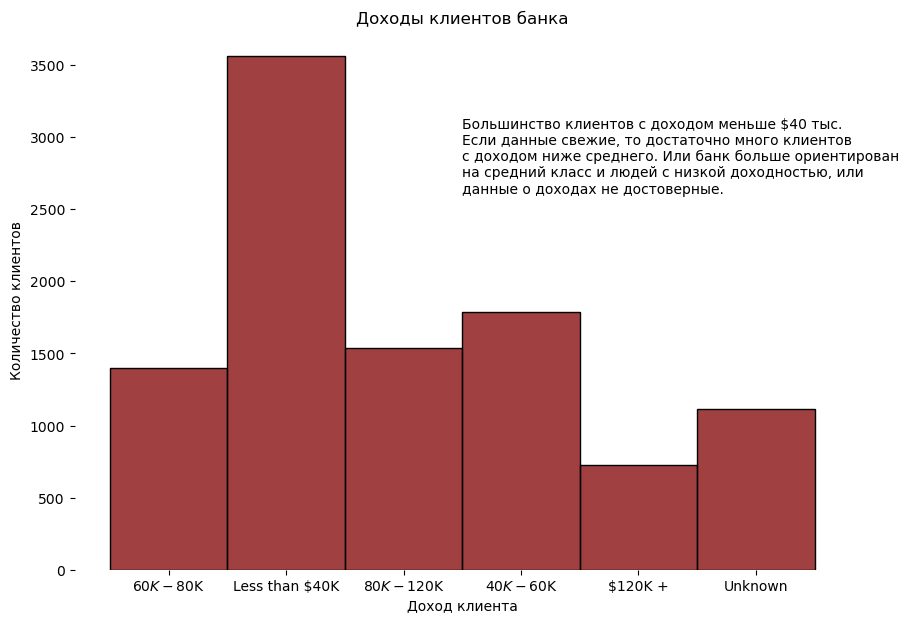

In [10]:
# hist plot 

age_text = '''
Большинство клиентов с доходом меньше $40 тыс. 
Если данные свежие, то достаточно много клиентов 
с доходом ниже среднего. Или банк больше ориентирован 
на средний класс и людей с низкой доходностью, или
данные о доходах не достоверные. 
'''

ages = df['Income_Category']

plt.figure(figsize = (10,7))
sns.histplot(data = df, x = ages, bins = 50, edgecolor='black', color = 'maroon', alpha = 0.75)
plt.xlabel('Доход клиента')
plt.ylabel('Количество клиентов')
plt.title('Доходы клиентов банка')
plt.box(False)
plt.annotate(age_text, (2.5, 2500));

pdf.savefig()

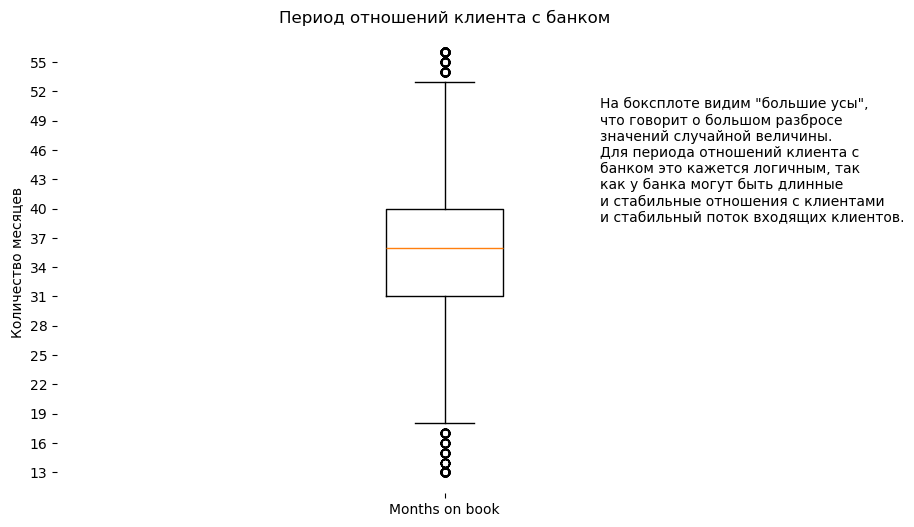

In [11]:
# box plot - months on book

client_text = '''
На боксплоте видим "большие усы", 
что говорит о большом разбросе
значений случайной величины. 
Для периода отношений клиента с 
банком это кажется логичным, так
как у банка могут быть длинные 
и стабильные отношения с клиентами
и стабильный поток входящих клиентов.
'''

months = df['Months_on_book']
months
plt.figure(figsize=(10,6))
plt.boxplot(months, labels = ['Months on book'])
plt.yticks(np.arange(df['Months_on_book'].min(), df['Months_on_book'].max(), 3))
plt.ylabel('Количество месяцев')
plt.title('Период отношений клиента с банком')
plt.box(False)
plt.annotate(client_text, (1.2, 37))

pdf.savefig()

In [12]:
# heatmap plot - 

df_corr = df[['Months_on_book', 'Months_Inactive_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']] 
heatmap_data = df_corr.corr()
heatmap_data

,Months_on_book,Months_Inactive_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
Months_on_book,1.000000,0.074164,0.008623,-0.048959,-0.038591,-0.049819,-0.014072
Months_Inactive_12_mon,0.074164,1.000000,-0.042210,-0.032247,-0.036982,-0.042787,-0.038989
Total_Revolving_Bal,0.008623,-0.042210,1.000000,0.058174,0.064370,0.056060,0.089861
Total_Amt_Chng_Q4_Q1,-0.048959,-0.032247,0.058174,1.000000,0.039678,0.005469,0.384189
Total_Trans_Amt,-0.038591,-0.036982,0.064370,0.039678,1.000000,0.807192,0.085581
Total_Trans_Ct,-0.049819,-0.042787,0.056060,0.005469,0.807192,1.000000,0.112324
Total_Ct_Chng_Q4_Q1,-0.014072,-0.038989,0.089861,0.384189,0.085581,0.112324,1.000000


In [13]:
# pie chart

pie_data = df['Marital_Status'].value_counts()
pie_data

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

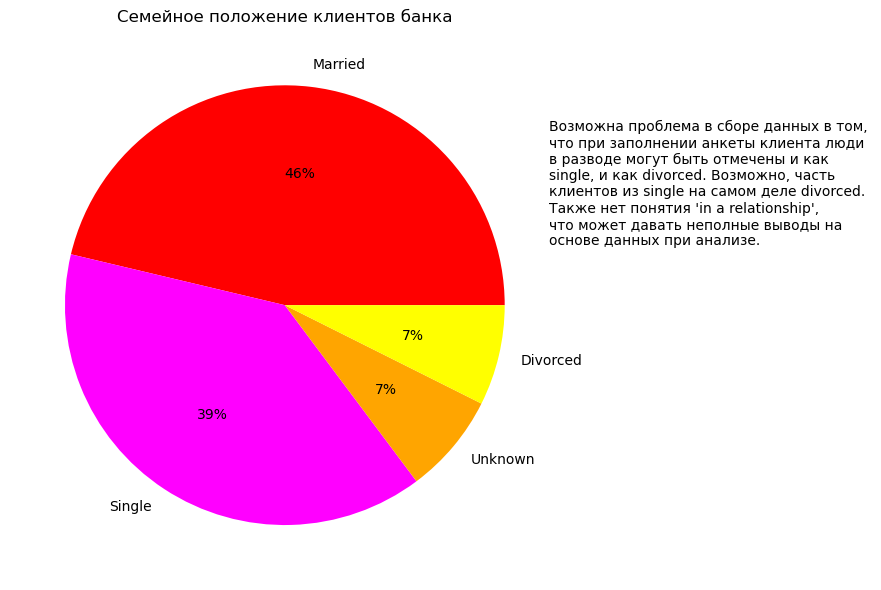

In [14]:
values = [4687, 3943, 749, 748]
names = ['Married', 'Single', 'Unknown', 'Divorced']

family_text = '''
Возможна проблема в сборе данных в том, 
что при заполнении анкеты клиента люди
в разводе могут быть отмечены и как 
single, и как divorced. Возможно, часть 
клиентов из single на самом деле divorced.
Также нет понятия 'in a relationship', 
что может давать неполные выводы на 
основе данных при анализе. 
'''

plt.figure(figsize=(11,6))
plt.pie(values, labels = names, colors = ['red', 'magenta', 'orange', 'yellow'], autopct = '%.0f%%')
plt.title('Семейное положение клиентов банка')
plt.annotate(family_text, (1.2, 0.2))
plt.tight_layout()

pdf.savefig()

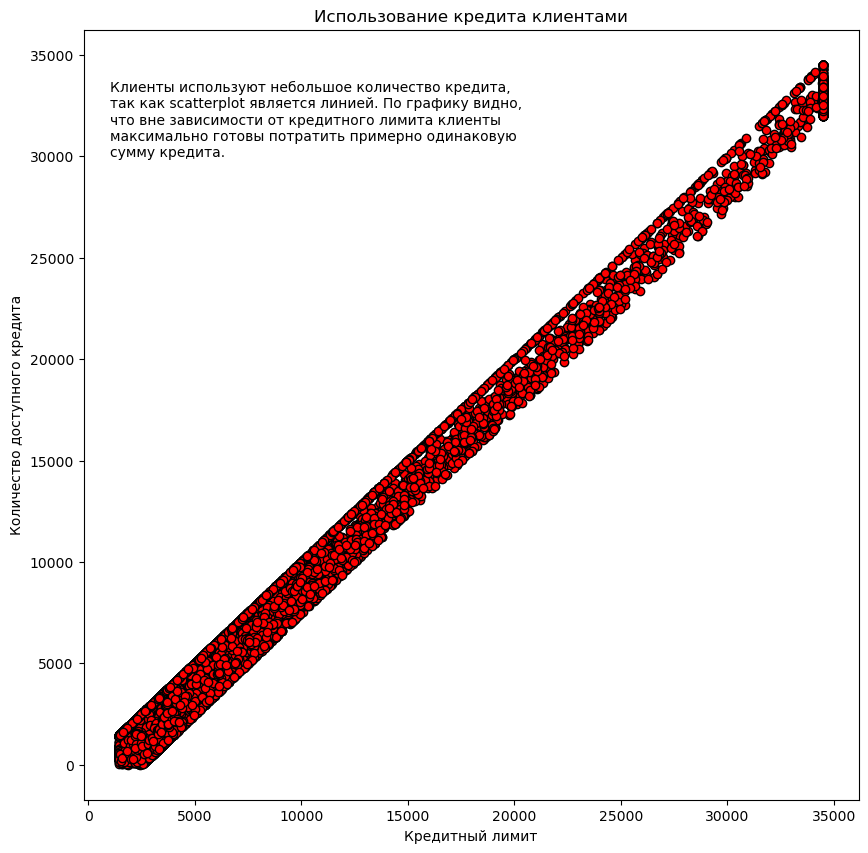

In [15]:
# scatter plot: months on book and credit_limit

# open to buy is the amount of unused credit 
credit_text = """
Клиенты используют небольшое количество кредита, 
так как scatterplot является линией. По графику видно,
что вне зависимости от кредитного лимита клиенты 
максимально готовы потратить примерно одинаковую 
сумму кредита. """

plt.figure(figsize = (10, 10))
x_vals = df['Credit_Limit']
y_vals = df['Avg_Open_To_Buy']
plt.xlabel('Кредитный лимит')
plt.ylabel('Количество доступного кредита')
plt.title('Использование кредита клиентами')
plt.annotate(credit_text, (1000, 30000))
plt.scatter(x_vals, y_vals, color = 'red', edgecolors = 'black');

pdf.savefig()

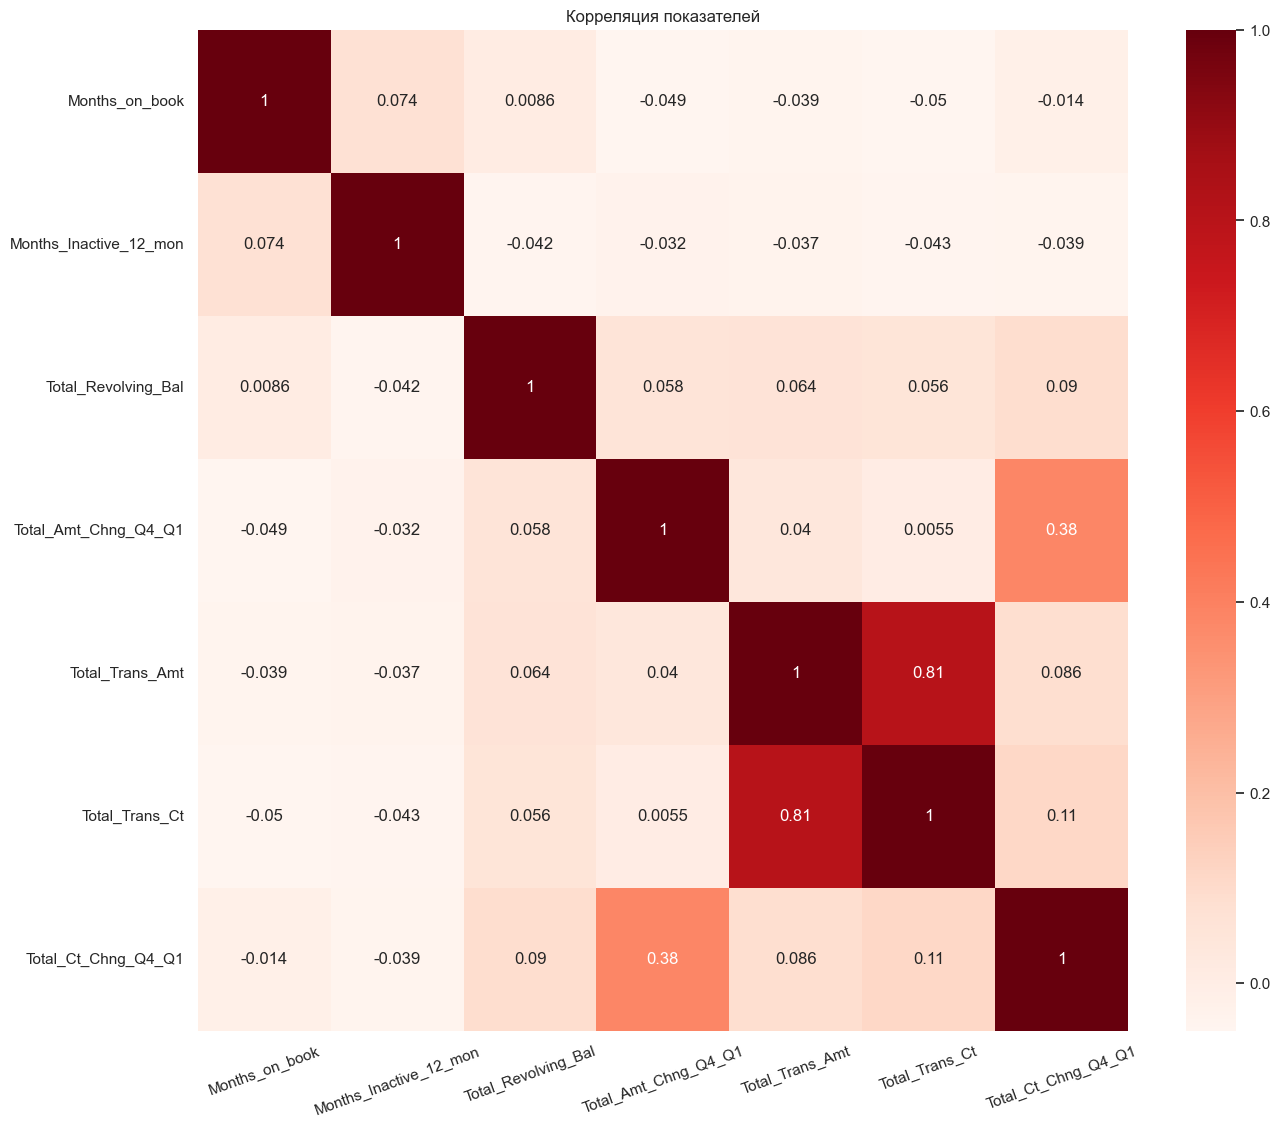

In [16]:
# plt.figsize = (10,5)
sns.set_theme(rc={'figure.figsize':(15, 13)})
sns.heatmap(heatmap_data, cmap="Reds", annot=True)
plt.xticks(rotation=20)
plt.title('Корреляция показателей');

pdf.savefig()

In [17]:
pdf.close()